In [ ]:
!unrar x /content/drive/MyDrive/Last/Buah.rar -d /content/drive/MyDrive/Last


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Last/Buah.rar

Creating    /content/drive/MyDrive/Last/Buah                          OK
Creating    /content/drive/MyDrive/Last/Buah/test                     OK
Creating    /content/drive/MyDrive/Last/Buah/test/apple               OK
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_1.jpg        0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_10.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_2.jpg        0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_3.jpg        0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_4.jpg        0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_5.jpg        0%  OK 
Extracting  /content/drive/MyDrive/Last/Buah/test/apple/Image_6.JPG        0%  OK 
Extract

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

# Tensorflow import
import tensorflow as tf
# Import library Keras
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [4]:
train_dir = "/content/drive/MyDrive/Last/Buah/train"
valid_dir = "/content/drive/MyDrive/Last/Buah/validation"
test_dir = "/content/drive/MyDrive/Last/Buah/test"
num_classes = 15

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 1279 images belonging to 15 classes.
Found 149 images belonging to 15 classes.
Found 146 images belonging to 15 classes.


In [7]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15
39/39 [==============================] - 427s 11s/step - loss: 0.8858 - accuracy: 0.7370 - val_loss: 0.2500 - val_accuracy: 0.8906
Epoch 2/15
39/39 [==============================] - 128s 3s/step - loss: 0.2363 - accuracy: 0.9246 - val_loss: 0.1452 - val_accuracy: 0.9531
Epoch 3/15
39/39 [==============================] - 138s 3s/step - loss: 0.1284 - accuracy: 0.9623 - val_loss: 0.1280 - val_accuracy: 0.9766
Epoch 4/15
39/39 [==============================] - 124s 3s/step - loss: 0.0647 - accuracy: 0.9816 - val_loss: 0.1347 - val_accuracy: 0.9688
Epoch 5/15
39/39 [==============================] - 120s 3s/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0926 - val_accuracy: 0.9766
Epoch 6/15
39/39 [==============================] - 123s 3s/step - loss: 0.0449 - accuracy: 0.9872 - val_loss: 0.0848 - val_accuracy: 0.9766
Epoch 7/15
39/39 [==============================] - 126s 3s/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.1252 - val_accuracy: 0.9766
Epoch 8/15
3

In [12]:
model.evaluate(test_generator)

5/5 [==============================] - 38s 8s/step - loss: 0.1368 - accuracy: 0.9732


[0.13683366775512695, 0.9731543660163879]

In [13]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.885845,0.736969,0.249977,0.890625
1,0.236328,0.924619,0.145212,0.953125
2,0.128354,0.962310,0.128018,0.976562
3,0.064674,0.981556,0.134734,0.968750
4,0.056809,0.982358,0.092575,0.976562


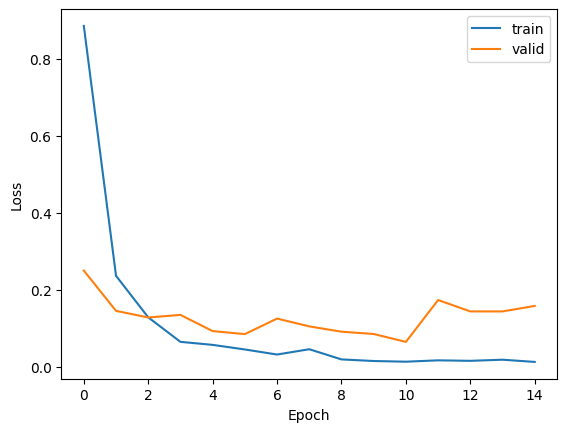

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

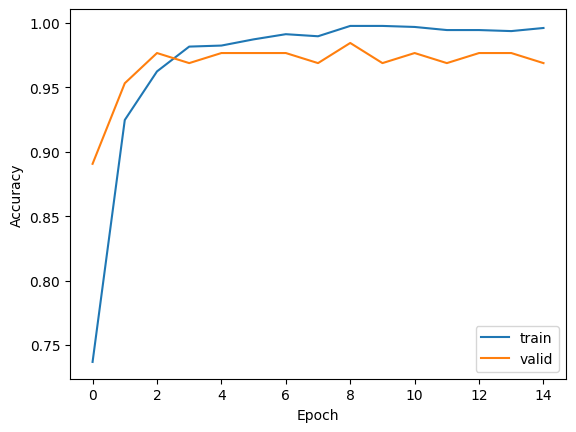

In [15]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [16]:
preds = model.predict(test_generator)

5/5 [==============================] - 13s 2s/step


In [17]:
y_pred = np.argmax(preds, axis=1)

In [18]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : bell pepper
3 : cucumber
4 : eggplant
5 : grapes
6 : kiwi
7 : lemon
8 : mango
9 : orange
10 : pear
11 : pineapple
12 : pomegranate
13 : tomato
14 : watermelon


In [19]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "bell pepper",
    3 : "cucumber",
    4 : "eggplant",
    5 : "grapes",
    6 : "kiwi",
    7 : "lemon",
    8 : "mango",
    9 : "orange",
    10 : "pear",
    11 : "pineapple",
    12 : "pomegranate",
    13 : "tomato",
    14 : "watermelon"
}

In [20]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [21]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       0.80      1.00      0.89         8
      banana       0.78      1.00      0.88         7
 bell pepper       1.00      1.00      1.00        10
    cucumber       1.00      1.00      1.00        10
    eggplant       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
        kiwi       1.00      1.00      1.00        10
       lemon       1.00      0.83      0.91        12
       mango       1.00      1.00      1.00        10
      orange       1.00      1.00      1.00        10
        pear       1.00      1.00      1.00        10
   pineapple       1.00      1.00      1.00        10
 pomegranate       1.00      1.00      1.00        10
      tomato       1.00      1.00      1.00        10
  watermelon       1.00      0.83      0.91        12

    accuracy                           0.97       149
   macro avg       0.97      0.98      0.97       149
weighted avg       0.98   

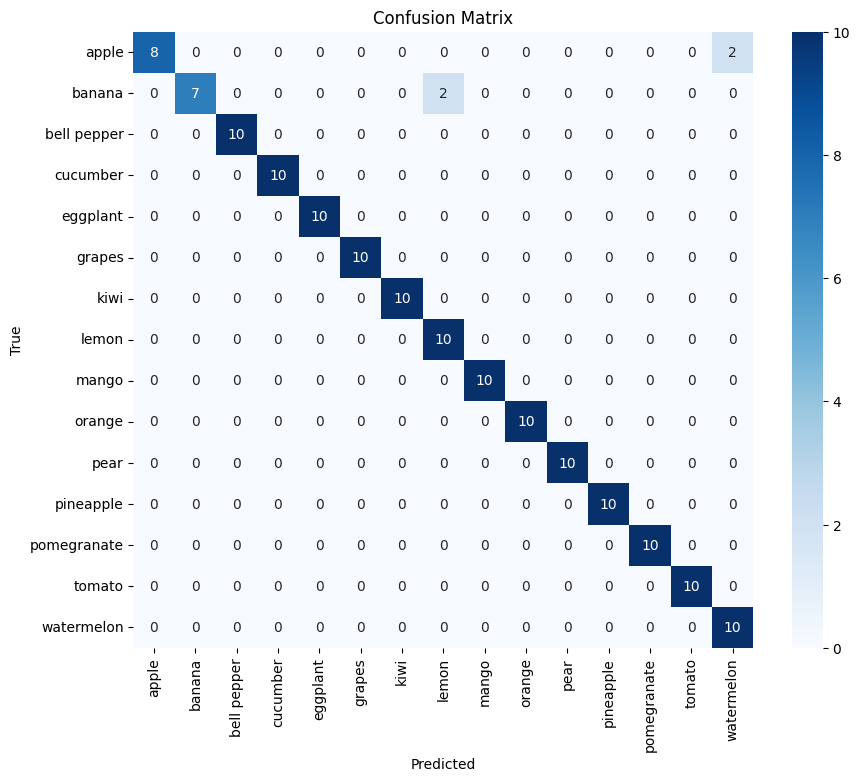

              precision    recall  f1-score   support

       apple       1.00      0.80      0.89        10
      banana       1.00      0.78      0.88         9
 bell pepper       1.00      1.00      1.00        10
    cucumber       1.00      1.00      1.00        10
    eggplant       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
        kiwi       1.00      1.00      1.00        10
       lemon       0.83      1.00      0.91        10
       mango       1.00      1.00      1.00        10
      orange       1.00      1.00      1.00        10
        pear       1.00      1.00      1.00        10
   pineapple       1.00      1.00      1.00        10
 pomegranate       1.00      1.00      1.00        10
      tomato       1.00      1.00      1.00        10
  watermelon       0.83      1.00      0.91        10

    accuracy                           0.97       149
   macro avg       0.98      0.97      0.97       149
weighted avg       0.98   

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=pred_classes.values(), yticklabels=pred_classes.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred))


9/9 [==============================] - 9s 934ms/step


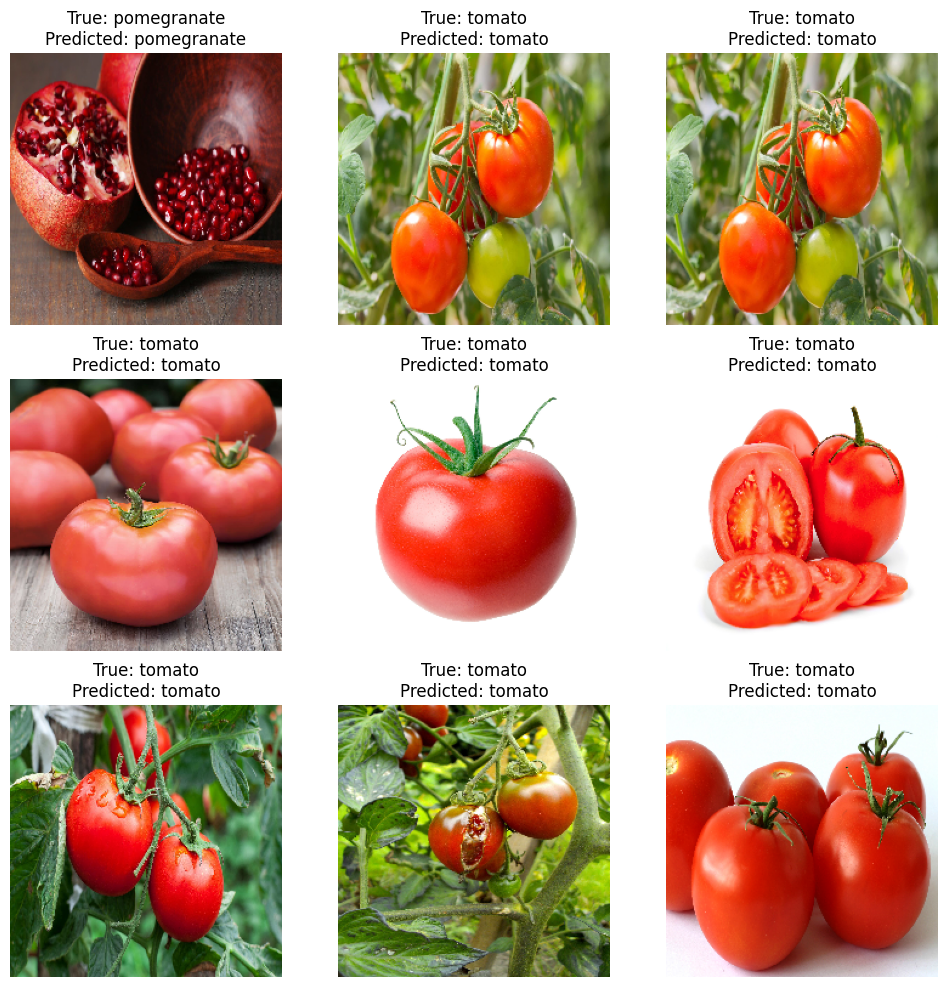

In [25]:
# Mengambil beberapa gambar dari generator pengujian dengan variasi kelas yang berbeda
num_images = 9
test_images = []
test_labels = []

# Memilih beberapa batch dari generator pengujian
for i in range(num_images):
    batch_images, batch_labels = next(test_generator)
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = model.predict(test_images)

# Mengatur ukuran subplot
plt.figure(figsize=(12, 12))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)

    # Menampilkan gambar
    plt.imshow(test_images[i])
    plt.axis('off')

    # Mendapatkan kelas sebenarnya dan hasil prediksi
    true_class = pred_classes[test_labels[i].argmax()]
    predicted_class = pred_classes[test_predictions[i].argmax()]

    # Menambahkan keterangan pada subplot
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}')

plt.show()


In [ ]:
import tensorflow as tf

# Definisi dan kompilasi model Anda di sini

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TFLite ke direktori yang diinginkan
file_path = "/content/drive/MyDrive/Last/Buah/modelbesar.h5"
with open(file_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model TensorFlow Lite telah disimpan di: {file_path}")

Model TensorFlow Lite telah disimpan di: /content/drive/MyDrive/Last/Buah/modelbesar.h5


In [ ]:
import tensorflow as tf

# Definisi dan kompilasi model Anda di sini

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TFLite ke direktori yang diinginkan
file_path = "/content/drive/MyDrive/Last/Buah/model.tflite"
with open(file_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model TensorFlow Lite telah disimpan di: {file_path}")

Model TensorFlow Lite telah disimpan di: /content/drive/MyDrive/Last/Buah/model.tflite


In [ ]:
# Simpan model ke dalam file .h5
model.save("/content/drive/MyDrive/Last/Buah/fruit_model.h5")

# Pesan konfirmasi
print("Model berhasil disimpan sebagai fruit_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model berhasil disimpan sebagai fruit_model.h5


In [ ]:
from keras.models import load_model

# Memuat kembali model dari file .h5
loaded_model = load_model("/content/drive/MyDrive/Last/Buah/fruit_model.h5")

# Contoh penggunaan model yang dimuat
predictions = loaded_model.predict(test_generator)

5/5 [==============================] - 14s 2s/step
